### Importing essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing 
import scipy.optimize as opt
import statsmodels.api as sm
import matplotlib.mlab as mlab

### Data Preparation

In [2]:
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.drop(['education'], axis = 1, inplace = True)

In [7]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [8]:
df.rename(columns = {'male' : 'Sex_male'},inplace = True)

In [9]:
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [10]:
df.dropna(axis=0,inplace = True)

In [11]:
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [12]:
print(df.head(), df.shape)

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [13]:
print(df.TenYearCHD.value_counts())

0    3179
1     572
Name: TenYearCHD, dtype: int64


### Splitting the Dataset into Test and Train Sets

In [14]:
X = np.asarray(df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
Y = np.asarray(df['TenYearCHD'])

In [15]:
X

array([[ 39. ,   1. ,   0. , 195. , 106. ,  77. ],
       [ 46. ,   0. ,   0. , 250. , 121. ,  76. ],
       [ 48. ,   1. ,  20. , 245. , 127.5,  70. ],
       ...,
       [ 52. ,   0. ,   0. , 269. , 133.5, 107. ],
       [ 40. ,   1. ,   0. , 185. , 141. ,  72. ],
       [ 39. ,   0. ,  30. , 196. , 133. ,  80. ]])

In [16]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size =0.3, random_state =4)

In [19]:
print("Train size: ",x_train.shape, y_train.shape)
print("Test size: ",x_test.shape, y_test.shape)

Train size:  (2625, 6) (2625,)
Test size:  (1126, 6) (1126,)


### Exploratory Data Analysis of Heart Disease Dataset

C:\Users\shrey\AppData\Local\Temp\ipykernel_13580\647778808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'TenYearCHD', data = df,palette="BuGn_r")


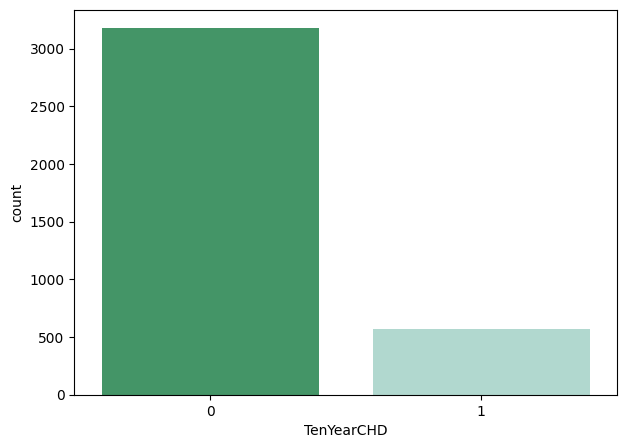

In [20]:
# counting no. of patients affected with Coronary heart disease (CHD)
plt.figure(figsize= (7,5))
sns.countplot(x = 'TenYearCHD', data = df,palette="BuGn_r")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_13580\2101733468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'TenYearCHD', data = df,palette="BuGn_r")


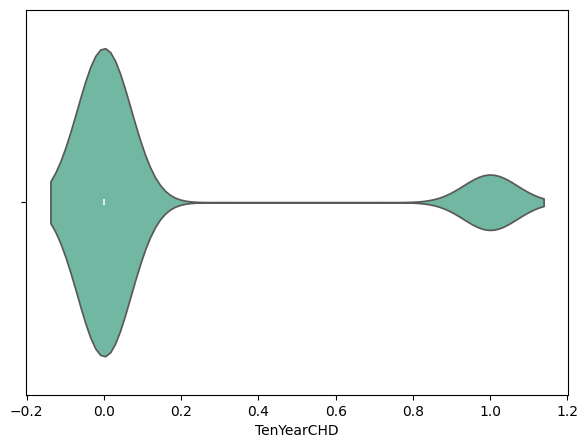

In [21]:
# counting no. of patients affected with Coronary heart disease (CHD)
plt.figure(figsize= (7,5))
sns.violinplot(x = 'TenYearCHD', data = df,palette="BuGn_r")
plt.show()

In [22]:
# Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)

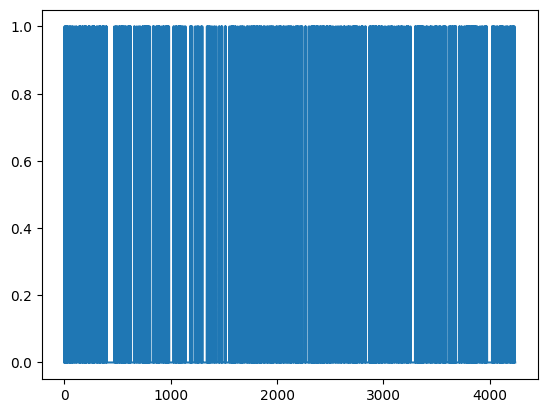

In [23]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
lr_accuracy = accuracy_score(y_pred,y_test)
print("Accuracy of model:", lr_accuracy)

Accuracy of model: 0.8490230905861457


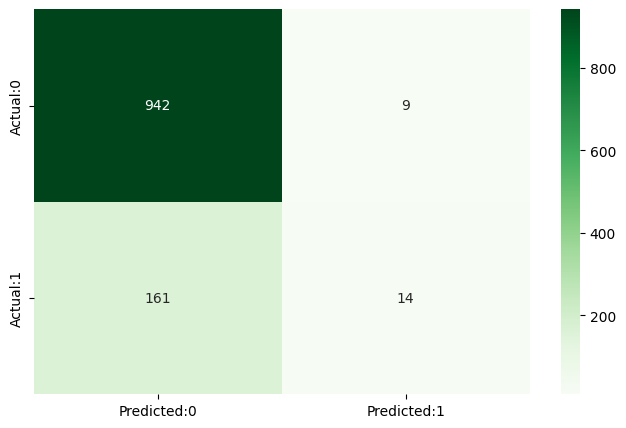

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [28]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [30]:
rf = RandomForestClassifier()
xgb = XGBClassifier(eval_metric='logloss')

In [31]:
# Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_

In [32]:
# Train models
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
# Predictions
y_pred_rf = rf.predict(x_test)
y_pred_xgb = xgb.predict(x_test)

In [34]:
# Evaluate models
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:",rf_accuracy )
print(classification_report(y_test, y_pred_rf))

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:",xgb_accuracy )
print(classification_report(y_test, y_pred_xgb))

Random Forest Accuracy: 0.8428063943161634
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       951
           1       0.48      0.11      0.18       175

    accuracy                           0.84      1126
   macro avg       0.67      0.55      0.55      1126
weighted avg       0.80      0.84      0.80      1126

XGBoost Accuracy: 0.8268206039076377
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       951
           1       0.37      0.16      0.22       175

    accuracy                           0.83      1126
   macro avg       0.61      0.55      0.56      1126
weighted avg       0.78      0.83      0.80      1126



Random Forest Accuracy: 0.8428063943161634
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       951
           1       0.48      0.11      0.18       175

    accuracy                           0.84      1126
   macro avg       0.67      0.55      0.55      1126
weighted avg       0.80      0.84      0.80      1126



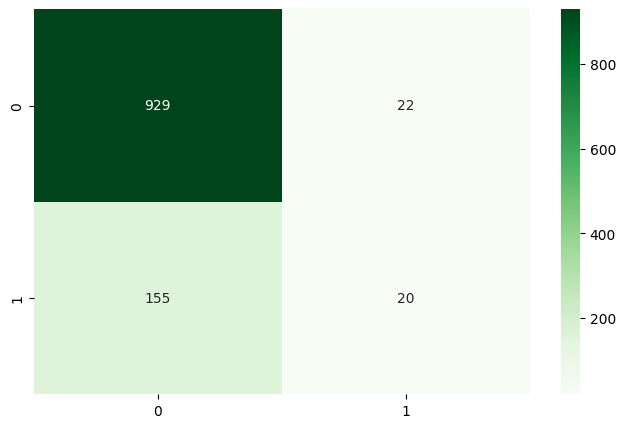

Confusion Matrix for XGBoost:
[[929  22]
 [155  20]]


In [35]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])                     
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_rf))


XGBoost Accuracy: 0.8268206039076377
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       951
           1       0.37      0.16      0.22       175

    accuracy                           0.83      1126
   macro avg       0.61      0.55      0.56      1126
weighted avg       0.78      0.83      0.80      1126



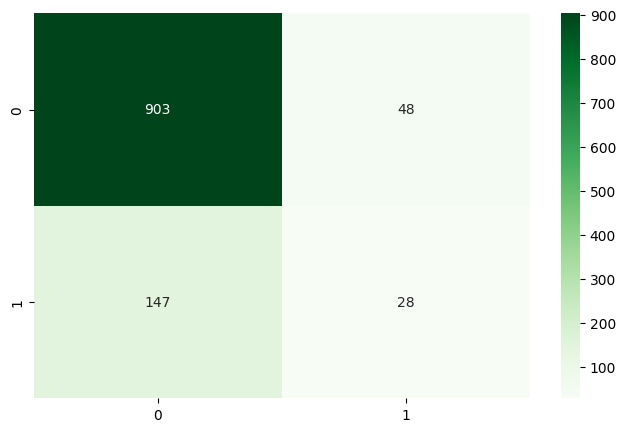

Confusion Matrix for XGBoost:
[[903  48]
 [147  28]]


In [36]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])                     
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))


In [37]:
model_accuracies = {"Logistic Regression": lr_accuracy,"Random Forest": rf_accuracy, "XGBoost": xgb_accuracy}
print("Model Accuracies:", model_accuracies)

Model Accuracies: {'Logistic Regression': 0.8490230905861457, 'Random Forest': 0.8428063943161634, 'XGBoost': 0.8268206039076377}


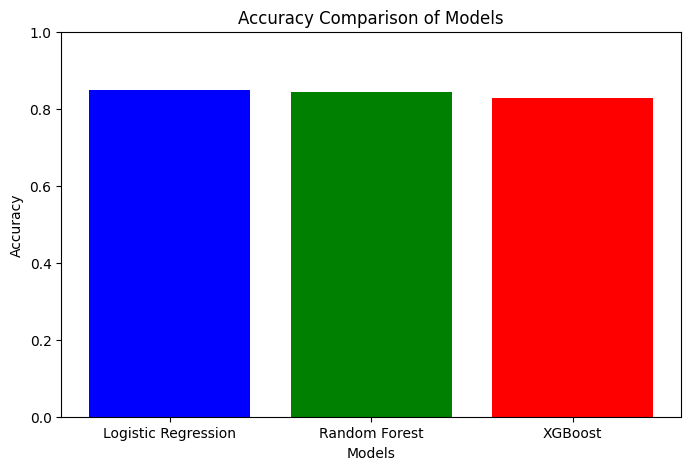

In [38]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.ylim(0, 1)
plt.show()